# 1.4.1. Classification

$\color{blue}{\rm{SVC}}$, $\color{blue}{\rm{NuSVC}}$ and $\color{blue}{\rm{LinearSVC}}$ are classes capable of performing multi-class classification on a dataset.

$\color{blue}{\rm{SVC}}$ and $\color{blue}{\rm{NuSVC}}$ are similar methods, but accept slightly different sets of parameters and have different mathematical formulations.

## 1.4.1.1 Mathematical formulation of SVC and NuSVC

### SVC

Our training data consists of $N$ samples $(x_1,y_1),(x_2,y_2),...,(x_N,y_N)$, with $x_i\in\mathbb{R}^p$ and $y_i\in\{-1,1\}$. And we define $G(x)=-1, if \ f(x)<0$; $G(x)=1, if \ f(x)>0$. Then we can define a hyperplane by

$$ \{ x : f(x)=x^T\beta + \beta_0 = 0 \}$$

to separate the two class regions. Note that $\beta$ is a unit vector : $\left\lVert \beta \right\lVert=1$. Intuitively, we introduce a classification rule :

$$ G(x)={\rm{sign}}[x^T\beta+\beta_0]$$

We know that $f(x)$ in the above formula gives the signed distance from a point $x$ to the hyperplane $f(x)=x^T\beta + \beta_0 = 0$. In the case that the classes are separable, we can find a function $f(x)=x^T\beta + \beta_0$ with $y_if(x_i)>0 \ \ \forall i$. Hence we are able to find the hyperplane that create the biggest $margin$ between the training points for class $1$ and $-1$. We can solve the optimization problem

$${\max_{\beta,\beta_0,\left\lVert \beta \right\lVert=1} M \\{\rm subject\ to}\ y_i(x_i\beta+\beta_0)\ge M, i=1,...,N,}$$

to obtain the optimal hyperplane. The closest points is measured $M$ units away from the hyperplane on either side between points from two classes, and hence it forms a $2M$ units wide band, called the $margin$.

We showed that this problem can be more conveniently rephrased as 

$${\min_{\beta,\beta_0} \left\lVert \beta \right\lVert\\
{\rm{subject\ to\ }}y_i(x_i^T\beta+\beta_0)\ge 1, i=1,...,N,}$$

Note that $M=1/\left\lVert \beta \right\lVert$. This is a convex optimization problem (quadratic criterion, linear inequality constraints).

Suppose now that the class overlap in feature space. One way to deal with the overlap is to still maximize $M$, but allow for some points to be on the wrong side of the margin. Define the **slack variables** $\zeta = (\zeta_1,\zeta_2,...,\zeta_N)$.

There are two intuitive ideas to slack the constraint:

$${\begin{align}
y_i(x_i^T\beta+\beta_0)\quad &\ge \quad  M-\zeta_i\\
&or \\
y_i(x_i\beta+\beta_0)\quad &\ge\quad  M(1-\zeta_i),\\
\forall i\ \zeta_i \ge 0, \sum_{i=1}^N\zeta_i &\le constant
\end{align}}$$

The two choices lead to different solutions. And we focus on the second one that is convex to optimize. 

The value $\zeta_i$ in the constraint $y_i(x_i^T\beta + \beta_0)\ge M(1-\zeta_i)$ is the proportional amount by which the prediction $f(x_i)=x_i^T\beta+\beta_0$ is on the wrong side of its margin. Misclassifications occurs when $\zeta_i>1$, hence the term $\sum\zeta_i$ measures the total number of training misclassifications.

Define $M=1/\left\lVert \beta \right\lVert$, and write the above optimization problem in the equivalent form

$${\min\left\lVert \beta \right\lVert\quad {\rm{subject\ to\ }}
\begin{equation}
\left\{
\begin{array}{c}
&y_i(x_i^T\beta+\beta_0)\ge 1-\zeta_i\ \forall i,\\
&\zeta_i\ge0,\sum\zeta_i\le \rm constant.
\end{array}
\right.
\end{equation}}$$

This is the usual way the support vector classifier is defined for the non-separable case.

We can solve this problem using Largange multioliers. Computationally it is easy to re-express the above formula in the equilvalent form :

$${\min_{\beta,\beta_0}\dfrac{1}{2}\left\lVert \beta \right\lVert^2 + C\sum_{i=1}^N\zeta_i\\
{\rm{subject\ to\quad }}\zeta_i>0, y_i(x_i^T\beta+\beta_0)\ge 1-\zeta_i\ \forall i}$$

where the "cost" parameter replaces the constant.

The Lagrange (primal) function is

$$L_p=\dfrac{1}{2}\left\lVert \beta \right\lVert^2 + C\sum_{i=1}^N\zeta_i-\sum_{i=1}^N\alpha_i[y_i(x_i^T\beta+\beta_0)-(1-\zeta_i)] - \sum_{i=1}^N\mu_i\zeta_i$$

which we minimize w.r.t $\beta,\beta_0$ and $\zeta_i$. Setting the respective derivatives to zero, we get

$$\begin{align}
\beta&=\sum_{i=1}^N\alpha_iy_ix_i,\quad\quad\quad &(1)\\
0&=\sum_{i=1}^N\alpha_iy_i \quad\quad\quad &(2)\\
a_i&=C-\mu_i,\ \forall i \quad\quad\quad &(3)
\end{align}$$

We show the process of simplification of the function using the above equations

$$\begin{align}
L_P&=\dfrac{1}{2}\left\lVert \beta \right\lVert^2+C\sum_{i=1}^N - \sum_{i=1}^N\alpha_iy_ix_i^T\beta+\sum_{i=1}^N\alpha_iy_i\beta_0+\sum_{i=1}^N\alpha_i-\sum_{i=1}^N\alpha_i\zeta_i\\
&=\dfrac{1}{2}\left\lVert \beta \right\lVert^2-\sum_{i=1}^N\alpha_iy_ix_i^T\beta+\sum_{i=1}^N\alpha_i
\end{align}$$

Note that $\alpha_i,\mu_i,\zeta_i\ge 0\ \forall i$. We obtain the Lagrangian (Wolfe) dual obejctive function

$$L_D=\sum_{i=1}^N\alpha_i-\dfrac{1}{2}\sum_{i=1}^N\sum_{j=1}^N\alpha_i\alpha_jy_iy_jx_i^Tx_j,\quad\quad (4)$$

whcih gives a lower bound on the above minimization problem for any feasible point. In addition to (1)-(3), the Karush-Kuln-Tucker conditions include the constraints

$$\begin{align}
\alpha_i[y_i(x_i^T\beta+\beta_0)-(1-\zeta_i)] &= 0, \quad\quad&(5)\\
\mu_i\zeta_i&=0,\quad\quad&(6)\\
y_i(x_i^T\beta+\beta)-(1-\zeta_i)&\ge 0 ,\quad\quad&(7)
\end{align}$$

for $i=1,...N$. All these equation(1)-(7) gives the solution to the primal and dual problem. From (1) we see that the solution for $\beta$ has the form

$$\hat\beta=\sum_{i=1}^N\hat\alpha y_ix_i,$$

with nozero coefficients $\hat\alpha_i$ only for those observations $i$ for which the constraints in (7) are exactly met ( due to (5) ). These observations are called the *support vectors*, which are held by the $support_vectors_$ in scikit-learn library.

## 1.4.2 Support Vector Machines and  Kernels

We can represent the optimization problem and its solution in a special way that only involves the input features via inner products. We do this directly for the tansformed feature vector $h(x_i)$.

The lagrange dual function has the form

$$L_D=\sum_{i=1}^N\alpha_i-\dfrac{1}{2}\sum_{i=1}^N\sum_{j=1}^N\alpha_i\alpha_jy_iy_j \left<  h(x_i),h(x_j) \right>$$

The solution function $f(x)$ can be written

$$\begin{align}
f(x)&=h(x)^T\beta+\beta_0\\
&=\sum_{i=1}^N\alpha_iy_i\left<h(x),h(x_i)\right>+\beta_0
\end{align}$$

## Example

### SVM : Maximum margin separating hyperplane

#### Plot the maximum margin separating hyperplane within a two-class separating hyperplane within a two-class separable dataset using a Support Vector Machine

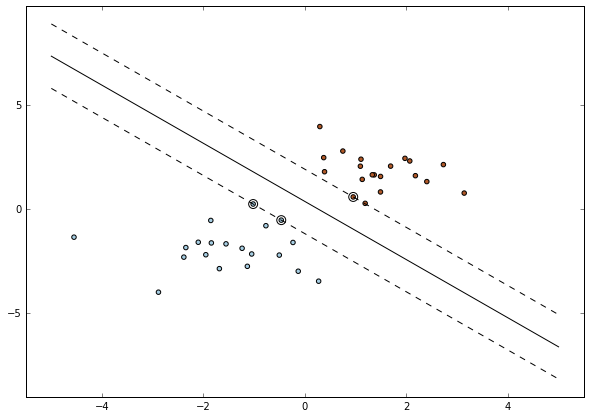

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Create 40 separable points
np.random.seed(0)
X = np.r_[np.random.randn(20,2)-[2,2], np.random.randn(20, 2)+[2,2]]
Y=[0] *20 + [1]*20

# Fit the model
clf = svm.SVC(kernel = 'linear')
clf.fit(X, Y)

# Get the separating hyperplane
w = clf.coef_[0]
a = -w[0]/w[1]
xx = np.linspace(-5,5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = clf.support_vectors_[0]
yy_down = a* xx +(b[1] - a*b[0])
b = clf.support_vectors_[-1]
yy_up = a* xx + (b[1] - a*b[0])

# Plot the line, the points and the nearest vectors to the plane
plt.figure(figsize=(10,7))
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:,1],
           s=80, facecolors='none')
plt.scatter(X[:,0], X[:, 1], c=Y, cmap=plt.cm.Paired)

plt.axis('tight')
plt.show()